In [1]:
from keras_preprocessing.text import text_to_word_sequence, Tokenizer
from nltk.tokenize import WordPunctTokenizer
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

## File path

In [2]:
file_path = 'C:/Users/SJH/OneDrive - korea.ac.kr/문서/MBTI 500.csv'

## Date Load & check

In [3]:
data = pd.read_csv(file_path, encoding = "UTF-8")

In [4]:
X, y = data.drop('type', axis = 1), data['type']

## Distribution of label and so on

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106067 entries, 0 to 106066
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   106067 non-null  object
 1   type    106067 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [6]:
data.isnull().sum()

posts    0
type     0
dtype: int64

In [7]:
print(X.nunique(), len(X)) # Same

posts    106067
dtype: int64 106067


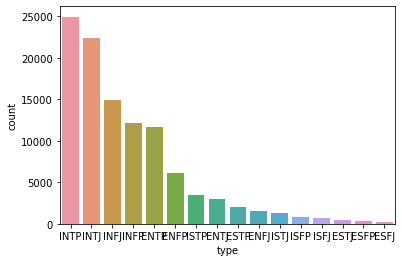

      posts
type       
ENFJ   1534
ENFP   6167
ENTJ   2955
ENTP  11725
ESFJ    181
ESFP    360
ESTJ    482
ESTP   1986
INFJ  14963
INFP  12134
INTJ  22427
INTP  24961
ISFJ    650
ISFP    875
ISTJ   1243
ISTP   3424
INTP    0.235332
INTJ    0.211442
INFJ    0.141071
INFP    0.114399
ENTP    0.110543
ENFP    0.058142
ISTP    0.032281
ENTJ    0.027860
ESTP    0.018724
ENFJ    0.014463
ISTJ    0.011719
ISFP    0.008250
ISFJ    0.006128
ESTJ    0.004544
ESFP    0.003394
ESFJ    0.001706
Name: type, dtype: float64


In [8]:
sns.countplot(x='type', data=data, order=y.value_counts().index)
plt.show()
count = data.groupby('type').count()

count.sort_values(by=['posts'], ascending=False)
print(count, y.value_counts(normalize=True), sep = '\n======================\n')

## Top 3000 words

In [9]:
tokenizer_top_words = Tokenizer(oov_token="<OOV>", split=' ', num_words=3000)
tokenizer_top_words.fit_on_texts(X.iloc[:, 0])
tokenizer_top_words.index_word

{1: '<OOV>',
 2: 'like',
 3: 'think',
 4: 'people',
 5: 'get',
 6: 'thing',
 7: 'make',
 8: 'know',
 9: 'feel',
 10: 'one',
 11: 'go',
 12: 'time',
 13: 'say',
 14: 'good',
 15: 'would',
 16: 'really',
 17: 'want',
 18: 'way',
 19: 'see',
 20: 'work',
 21: 'also',
 22: 'much',
 23: 'something',
 24: 'try',
 25: 'take',
 26: 'find',
 27: 'type',
 28: 'even',
 29: 'well',
 30: 'friend',
 31: 'need',
 32: 'lot',
 33: 'use',
 34: 'love',
 35: 'life',
 36: 'someone',
 37: 'mean',
 38: 'come',
 39: 'could',
 40: 'look',
 41: 'talk',
 42: 'though',
 43: 'person',
 44: 'give',
 45: 'always',
 46: 'never',
 47: 'interest',
 48: 'right',
 49: 'seem',
 50: 'understand',
 51: 'actually',
 52: 'year',
 53: 'help',
 54: 'still',
 55: 'tell',
 56: 'u',
 57: 'read',
 58: 'point',
 59: 'pretty',
 60: 'function',
 61: 'day',
 62: 'sure',
 63: 'start',
 64: 'bad',
 65: 'first',
 66: 'probably',
 67: 'different',
 68: 'idea',
 69: 'intj',
 70: 'long',
 71: 'relationship',
 72: 'anything',
 73: 'intp',
 74

In [10]:
# only 3000 words encoding
# tmp = X.head(10)
X_tp_words = X.copy()
X_tp_words['tok_tw'] = X_tp_words.apply(lambda v : tokenizer_top_words.texts_to_sequences([v['posts']]), axis = 1)

In [11]:
X_tp_words['tok_tw'] = X_tp_words.apply(lambda v: np.array(v['tok_tw']).reshape(-1, 1).tolist(), axis = 1)

In [12]:
X_tp_words['tok_tw_bool']=X_tp_words.apply(lambda v: list(map(lambda t: int(t[0] > 1), v['tok_tw'])), axis = 1)

## Words used more than 1000 times

In [13]:
word_dict = tokenizer_top_words.word_counts
word_dict = OrderedDict(sorted(word_dict.items(), key = lambda t : t[-1],reverse= True))

In [14]:
word_dict_top = []
for i, (key, value) in enumerate(word_dict.items()) :
    if value >= 1000 :
        word_dict_top.append(key)
print(f"size is {len(word_dict_top)}")

size is 4215


In [15]:
# Boolean encoding
X_freq_words = X.copy()
X_freq_words['tok_tw'] = X_freq_words.apply(lambda v : WordPunctTokenizer().tokenize(v['posts']), axis = 1)

In [16]:
X_freq_words['tok_tw_bool'] = X_freq_words.apply(lambda row : [1 if x in word_dict_top else 0 for x in row['tok_tw']], axis = 1)
X_freq_words

,posts,tok_tw,tok_tw_bool
0,know intj tool use interaction people excuse a...,"[know, intj, tool, use, interaction, people, e...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,rap music ehh opp yeah know valid well know fa...,"[rap, music, ehh, opp, yeah, know, valid, well...","[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,preferably p hd low except wew lad video p min...,"[preferably, p, hd, low, except, wew, lad, vid...","[1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,drink like wish could drink red wine give head...,"[drink, like, wish, could, drink, red, wine, g...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ..."
4,space program ah bad deal meing freelance max ...,"[space, program, ah, bad, deal, meing, freelan...","[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, ..."
...,...,...,...
106062,stay frustrate world life want take long nap w...,"[stay, frustrate, world, life, want, take, lon...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
106063,fizzle around time mention sure mistake thing ...,"[fizzle, around, time, mention, sure, mistake,...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
106064,schedule modify hey w intp strong wing underst...,"[schedule, modify, hey, w, intp, strong, wing,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
106065,enfj since january busy schedule able spend li...,"[enfj, since, january, busy, schedule, able, s...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ..."


## Dataframe print

In [17]:
X_tp_words

,posts,tok_tw,tok_tw_bool
0,know intj tool use interaction people excuse a...,"[[8], [69], [888], [33], [576], [4], [1087], [...","[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, ..."
1,rap music ehh opp yeah know valid well know fa...,"[[2084], [230], [1], [1], [117], [8], [1303], ...","[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,preferably p hd low except wew lad video p min...,"[[1], [508], [1], [378], [554], [1], [1], [334...","[0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,drink like wish could drink red wine give head...,"[[361], [2], [328], [39], [361], [980], [2644]...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ..."
4,space program ah bad deal meing freelance max ...,"[[509], [640], [993], [64], [234], [1], [1], [...","[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, ..."
...,...,...,...
106062,stay frustrate world life want take long nap w...,"[[327], [780], [81], [35], [17], [25], [70], [...","[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, ..."
106063,fizzle around time mention sure mistake thing ...,"[[1], [75], [12], [382], [62], [671], [6], [20...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
106064,schedule modify hey w intp strong wing underst...,"[[1252], [1], [544], [526], [73], [276], [1475...","[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
106065,enfj since january busy schedule able spend li...,"[[512], [121], [1], [1080], [1252], [174], [21...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ..."


In [18]:
X_freq_words

,posts,tok_tw,tok_tw_bool
0,know intj tool use interaction people excuse a...,"[know, intj, tool, use, interaction, people, e...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,rap music ehh opp yeah know valid well know fa...,"[rap, music, ehh, opp, yeah, know, valid, well...","[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,preferably p hd low except wew lad video p min...,"[preferably, p, hd, low, except, wew, lad, vid...","[1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,drink like wish could drink red wine give head...,"[drink, like, wish, could, drink, red, wine, g...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ..."
4,space program ah bad deal meing freelance max ...,"[space, program, ah, bad, deal, meing, freelan...","[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, ..."
...,...,...,...
106062,stay frustrate world life want take long nap w...,"[stay, frustrate, world, life, want, take, lon...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
106063,fizzle around time mention sure mistake thing ...,"[fizzle, around, time, mention, sure, mistake,...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
106064,schedule modify hey w intp strong wing underst...,"[schedule, modify, hey, w, intp, strong, wing,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
106065,enfj since january busy schedule able spend li...,"[enfj, since, january, busy, schedule, able, s...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ..."
